In [1]:
import numpy as np
import G3C_extension as cga
import plotly.graph_objects as go
import pandas as pd
import snake_sim as sim
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

count = 4
length = 0.5
initial_configuration = sim.configuration_multilink_random_planar(count=count, length=length)
iterations = 300
dt = 0.01
T = np.arange(dt, iterations*dt+dt, dt)
# constant velocity in x
dx = np.ones(iterations)*dt
# cos and shifted sin in y and z
dy = np.cos(12*T)*dt
dz = -np.sin(20*(T+np.pi/3.))*dt
configurations = sim.calculate_kinematics(initial_configuration, dx, dy, dz, iterations)

([<matplotlib.lines.Line2D at 0x24108cc73a0>],
 <matplotlib.legend.Legend at 0x24108cc7520>)

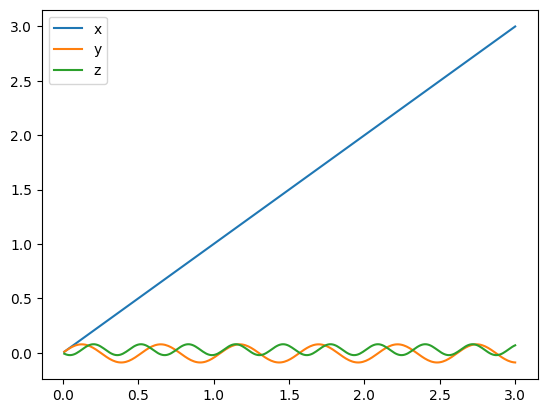

In [3]:
plt.plot(T, np.cumsum(dx)), plt.plot(T, np.cumsum(dy)), plt.plot(T, np.cumsum(dz)), plt.legend(["x", "y", "z"])

In [4]:
points = np.zeros([5, 3])
middle_config = configurations[0]
for i, link in enumerate(middle_config):
    print(i)
    p1, p2 = cga.decompose_point_pair(link)
    p1 = cga.down(p1)
    x, y, z = p1.value[1], p1.value[2], p1.value[3]
    points[i, 0] = x
    points[i, 1] = y
    points[i, 2] = z
    if link == middle_config[-1]:
        p2 = cga.down(p2)
        x, y, z = p2.value[1], p2.value[2], p2.value[3]
        points[i+1, 0] = x
        points[i+1, 1] = y
        points[i+1, 2] = z

0
1
2
3


In [5]:
middle_point = np.zeros([len(configurations) - 1, 3])
for i, config in enumerate(configurations[1:]):
    link = config[1]
    p1, p2 = cga.decompose_point_pair(link)
    p2 = cga.down(p2)
    x, y, z = p2.value[1], p2.value[2], p2.value[3]
    middle_point[i] = [x, y, z]

([<matplotlib.lines.Line2D at 0x24108c16460>],
 <matplotlib.legend.Legend at 0x24108e60bb0>)

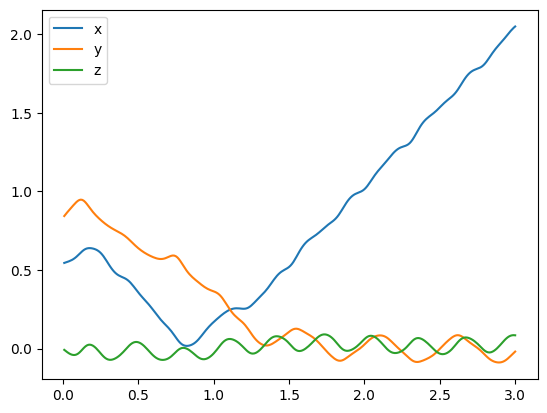

In [6]:
plt.plot(T, middle_point[:,0]), plt.plot(T, middle_point[:,1]), plt.plot(T, middle_point[:,2]), plt.legend(["x", "y", "z"])

In [7]:
last_point = np.zeros([len(configurations) - 1, 3])
for i, config in enumerate(configurations[1:]):
    link = config[-1]
    p1, p2 = cga.decompose_point_pair(link)
    p2 = cga.down(p2)
    x, y, z = p2.value[1], p2.value[2], p2.value[3]
    last_point[i] = [x, y, z]

([<matplotlib.lines.Line2D at 0x24109070a60>],
 <matplotlib.legend.Legend at 0x24108d96d00>)

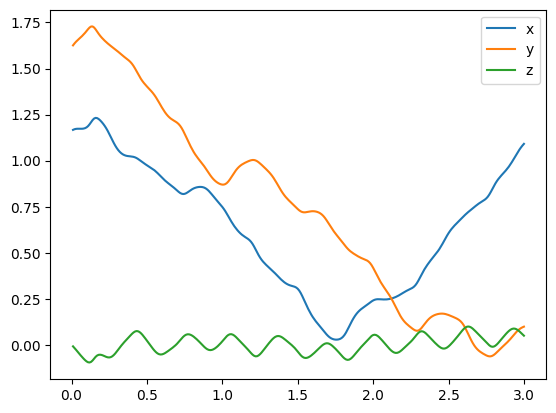

In [8]:
plt.plot(T, last_point[:,0]), plt.plot(T, last_point[:,1]), plt.plot(T, last_point[:,2]), plt.legend(["x", "y", "z"])

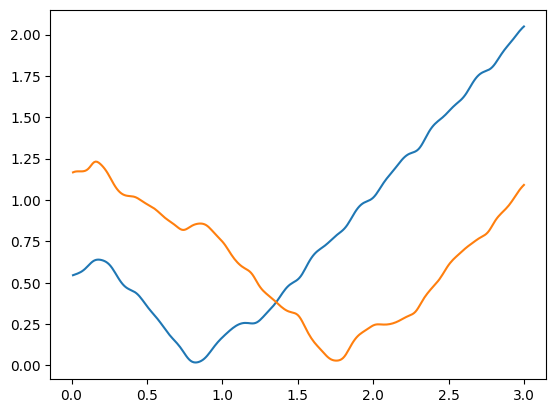

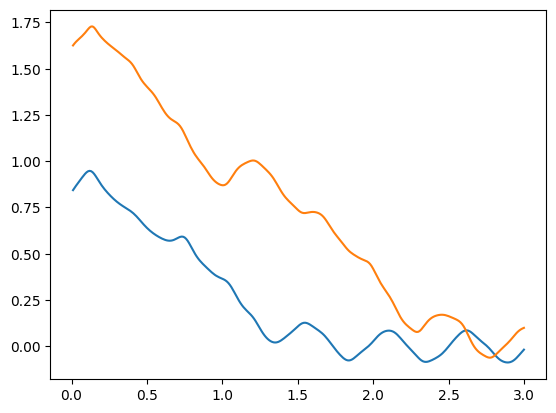

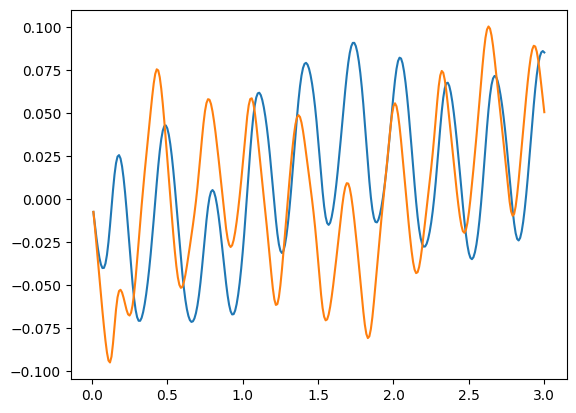

In [9]:
plt.plot(T, middle_point[:,0]), plt.plot(T, last_point[:, 0])
plt.show()
plt.plot(T, middle_point[:,1]), plt.plot(T, last_point[:, 1])
plt.show()
plt.plot(T, middle_point[:,2]), plt.plot(T, last_point[:, 2])
plt.show()

In [136]:
x_pts = np.zeros([len(configurations), 5])
y_pts = np.zeros([len(configurations), 5])
z_pts = np.zeros([len(configurations), 5])
for i, config in enumerate(configurations):
    points = cga.extract_unique_points(config)
    x, y, z = cga.extract_points_for_scatter(points)
    x_pts[i] = x
    y_pts[i] = y
    z_pts[i] = z

In [139]:
T = np.insert(T, 0, 0)
T

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

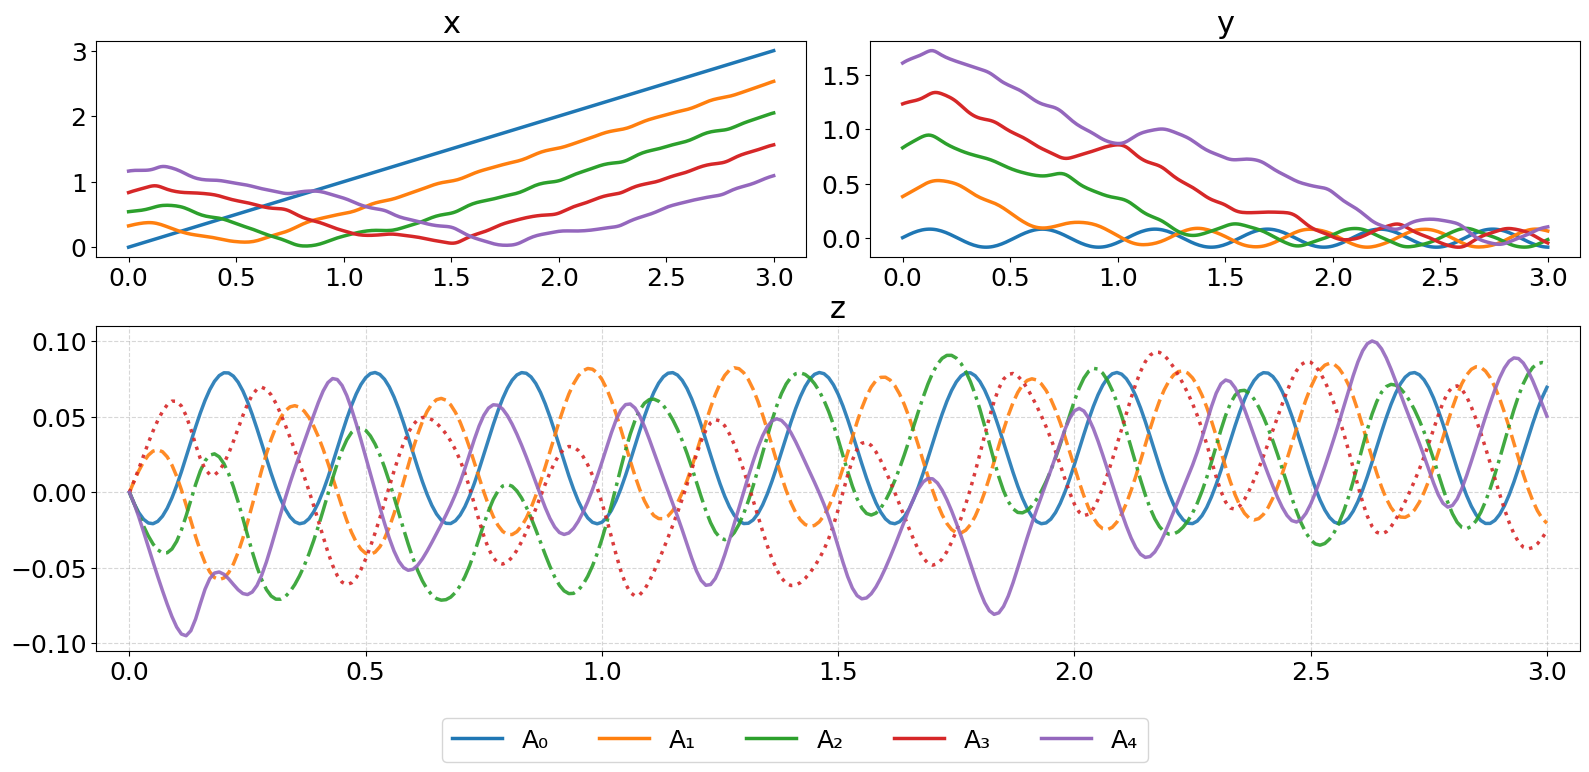

In [140]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

subscripts = ['₀', '₁', '₂', '₃', '₄']
labels = [f"A{sub}" for sub in subscripts]

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])
linestyles = ['-', '--', '-.', ':', '-']

linewidth = 2.5  # keep default or slightly thicker, but not increased much
title_fontsize = 22  # bigger titles
label_fontsize = 18  # for tick labels and axis labels if needed
legend_fontsize = 18  # bigger legend text

# Collect handles for shared legend
lines = []
default_style = '-'
second_style = '-'

# x plot (top-left)
ax0 = fig.add_subplot(gs[0, 0])
for i in range(5):
    style = default_style if i == 0 else second_style
    line, = ax0.plot(T, x_pts[:, i], linestyle=style, linewidth=linewidth)
    if len(lines) < 5:
        lines.append(line)
ax0.set_title("x", fontsize=title_fontsize)
ax0.tick_params(axis='both', labelsize=label_fontsize)

# y plot (top-right)
ax1 = fig.add_subplot(gs[0, 1])
for i in range(5):
    style = default_style if i == 0 else second_style
    ax1.plot(T, y_pts[:, i], linestyle=style, linewidth=linewidth)
ax1.set_title("y", fontsize=title_fontsize)
ax1.tick_params(axis='both', labelsize=label_fontsize)

# z plot (bottom, spanning both columns)
ax2 = fig.add_subplot(gs[1, :])
for i in range(5):
    style = default_style if i == 0 else second_style
    ax2.plot(T, z_pts[:, i], linestyle=linestyles[i], alpha=0.9, linewidth=linewidth)
ax2.set_title("z", fontsize=title_fontsize)
ax2.tick_params(axis='both', labelsize=label_fontsize)
ax2.grid(True, linestyle='--', alpha=0.5)

margin = 0.07
ax2.set_xlim(0 - margin, T[-1] + margin)

# Shared legend below all plots
fig.legend(lines, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.025), fontsize=legend_fontsize)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)  # more bottom space for legend
plt.savefig('coordinates.pdf', format='pdf', bbox_inches='tight')
plt.show()


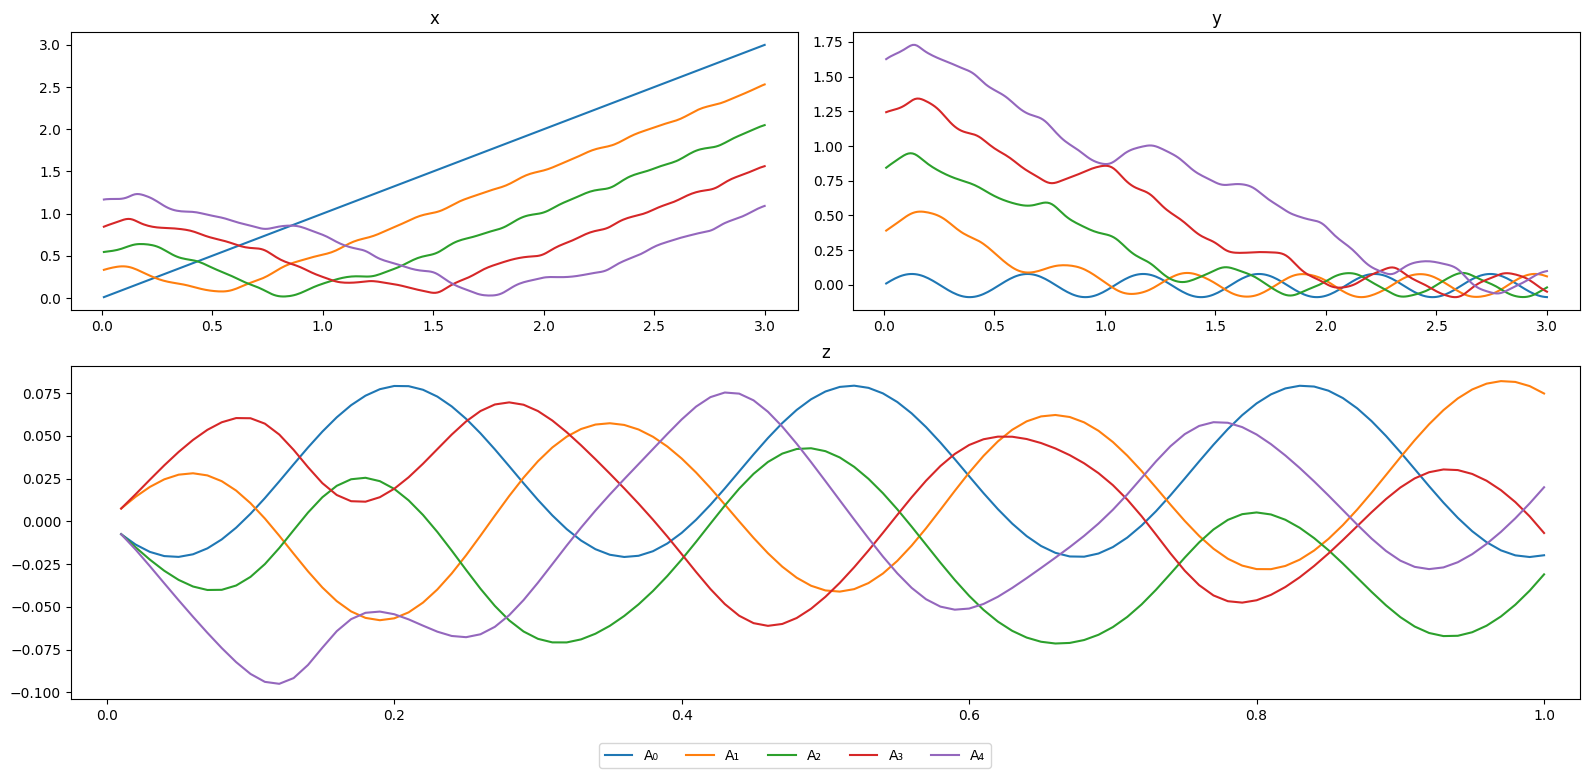

In [92]:
import matplotlib.gridspec as gridspec

subscripts = ['₀', '₁', '₂', '₃', '₄']
labels = [f"A{sub}" for sub in subscripts]

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])

# Collect handles for shared legend
lines = []

# x plot (top-left)
ax0 = fig.add_subplot(gs[0, 0])
for i in range(5):
    line, = ax0.plot(T, x_pts[:, i])
    if len(lines) < 5:
        lines.append(line)
ax0.set_title("x")

# y plot (top-right)
ax1 = fig.add_subplot(gs[0, 1])
for i in range(5):
    ax1.plot(T, y_pts[:, i])
ax1.set_title("y")

# z plot (bottom, spanning both columns)
ax2 = fig.add_subplot(gs[1, :])
for i in range(5):
    ax2.plot(T[:100], z_pts[:100, i], linestyle='-')
ax2.set_title("z")

# Stretch z plot's x-axis by 10% margin on both sides
# t_min, t_max = T[:100].min(), T[:100].max()
# margin = (t_max - t_min) * 0.024
margin = 0.025
ax2.set_xlim(0 - margin, 1 + margin)

# Shared legend below all plots
fig.legend(lines, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.025))

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()


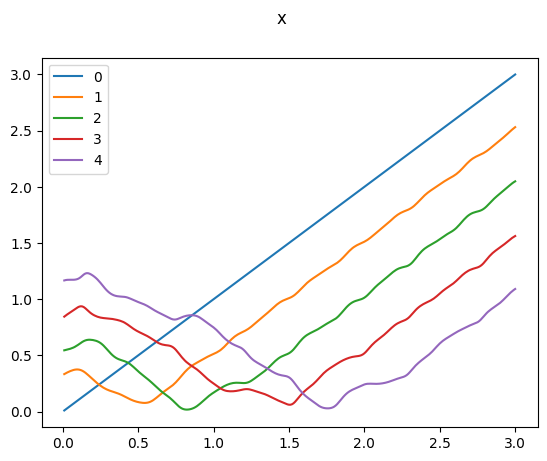

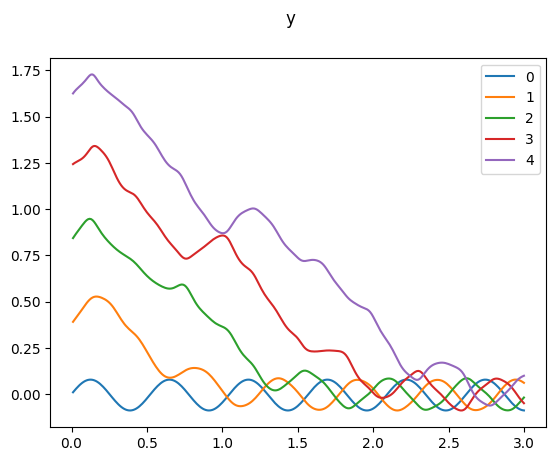

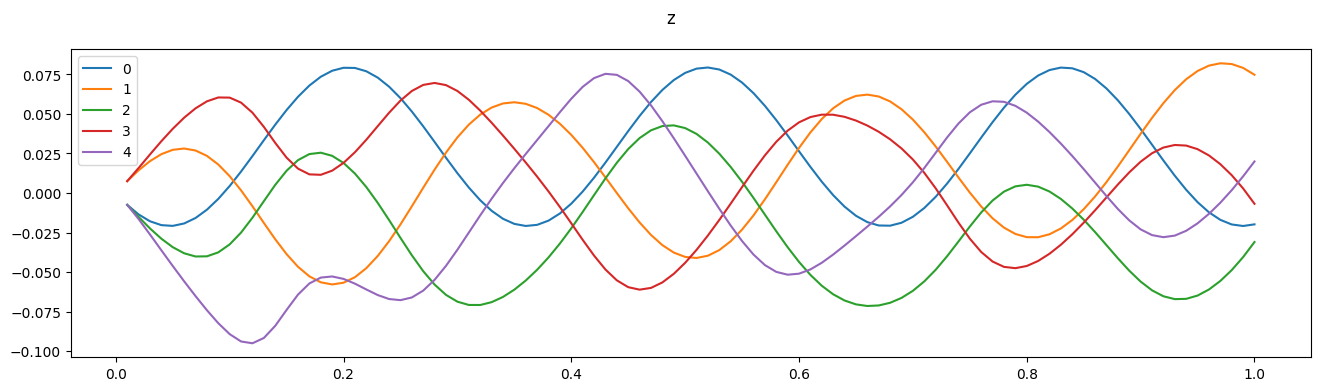

In [142]:
for i in range(5):
    plt.plot(T, x_pts[:, i])
plt.legend(["0", "1", "2", "3", "4"])
plt.suptitle("x")
plt.show()

for i in range(5):
    plt.plot(T, y_pts[:, i])
plt.legend(["0", "1", "2", "3", "4"])
plt.suptitle("y")
plt.show()

# linestyles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))]  # Example of 5 different styles
plt.figure(figsize=(16, 4))
for i in range(5):
    plt.plot(T[:100], z_pts[0:100, i])
# for i in [0, 1, 4]:
#     plt.plot(T, z_pts[:, i])
plt.legend(["0", "1", "2", "3", "4"])
plt.suptitle("z")
plt.show()

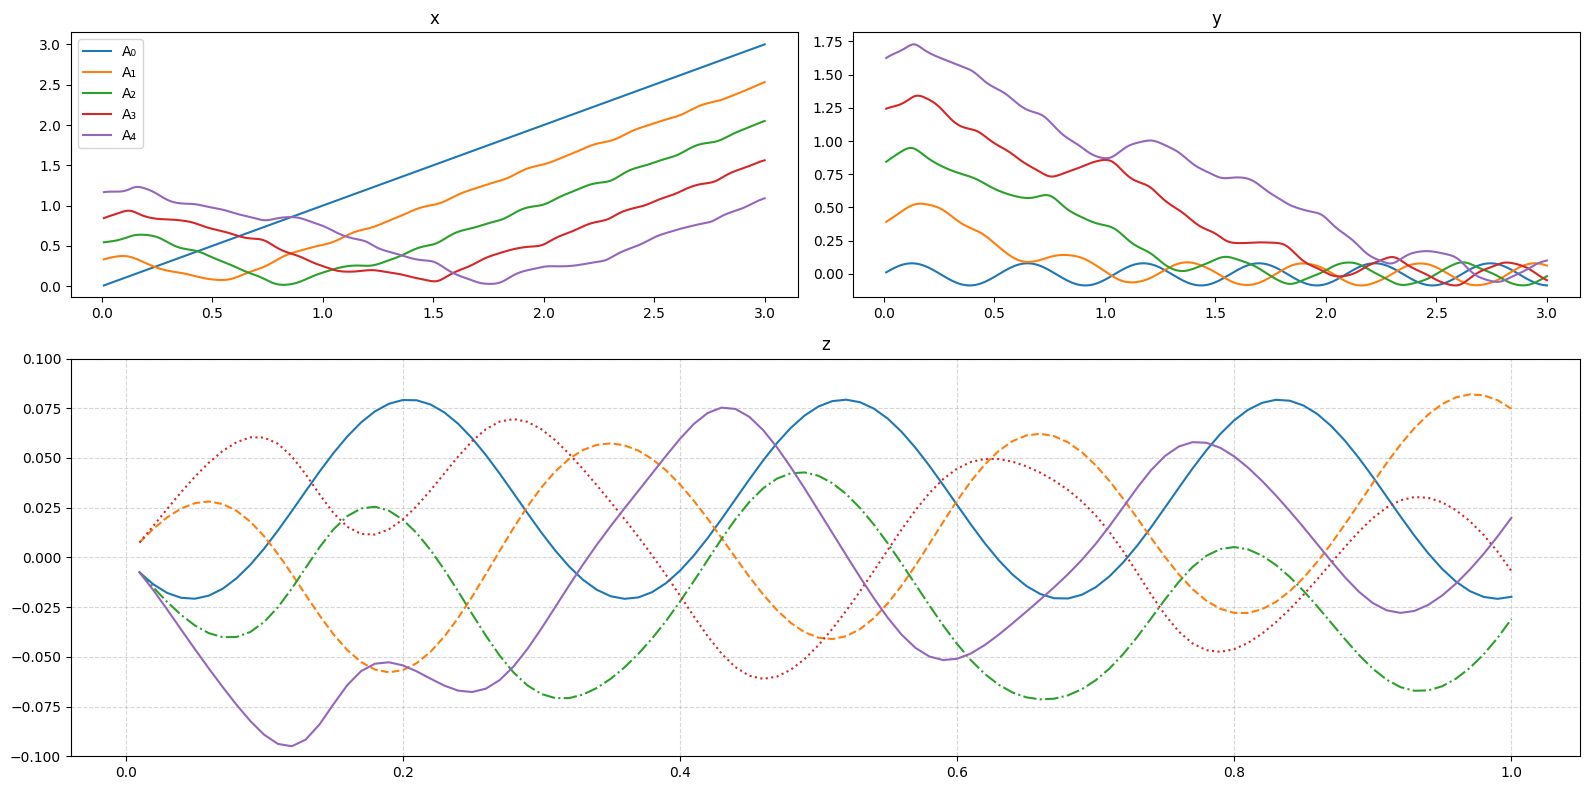

In [117]:
markers = ['o', 's', '^', 'D', 'x']
linestyles = ['-', '--', '-.', ':', '-']

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])

ax0 = fig.add_subplot(gs[0, 0])
for i in range(5):
    ax0.plot(T, x_pts[:, i])
ax0.set_title("x")
ax0.legend([f"A{subscripts[i]}" for i in range(5)])

ax1 = fig.add_subplot(gs[0, 1])
for i in range(5):
    ax1.plot(T, y_pts[:, i])
ax1.set_title("y")

ax2 = fig.add_subplot(gs[1, :])
for i in range(5):
    ax2.plot(T[:100], z_pts[:100, i], linestyle=linestyles[i], marker=markers[i], markersize=0, alpha=1)
ax2.set_title("z")
ax2.set_ylim(-0.1, 0.1)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [82]:
sim.visualise_simulation_animation(configurations).show()

In [15]:
fig = sim.visualise_simulation_start_to_finish(configurations)
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-1, 4], dtick=1),
        yaxis=dict(range=[-2, 2], dtick=1),
        zaxis=dict(range=[-2, 2], dtick=1),
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1),
    ),
    scene_camera=dict(
        eye=dict(x=1.75, y=1.65, z=0.5) 
    )
)
fig.show()
fig.write_image('start_finish.pdf')


In [51]:
# def visualise_simulation_animation_traces(
#     configs_PP, ghost_count=1, delay=5, frame_duration=50
# ):
#     """Plots the 3D animation of the snake robot."""
#     configurations_dictionary = {
#         0: cga.extract_points_for_scatter(cga.extract_unique_points(configs_PP[0]))
#     }
#     for i, config in enumerate(configs_PP, 1):
#         iteration_points = cga.extract_unique_points(config)
#         points_coordinates = cga.extract_points_for_scatter(iteration_points)
#         configurations_dictionary[i] = points_coordinates

#     configs_dataframe = pd.DataFrame(data=configurations_dictionary)

#     first_pos = configs_dataframe[configs_dataframe.columns[0]]

#     scatters = [
#         go.Scatter3d(
#             x=first_pos[0],
#             y=first_pos[1],
#             z=first_pos[2],
#             marker=dict(color="blue", opacity=1),
#             opacity=1,
#         )
#     ]
#     scatters.extend(
#         [
#             go.Scatter3d(
#                 x=first_pos[0],
#                 y=first_pos[1],
#                 z=first_pos[2],
#                 opacity=0,
#                 marker=dict(color="blue", opacity=0),
#             )
#             for _ in range(ghost_count)
#         ]
#     )

#     def update_scatters(current_index, delay, ghost_count):
#         scatters[0] = go.Scatter3d(
#             x=configs_dataframe[current_index][0],
#             y=configs_dataframe[current_index][1],
#             z=configs_dataframe[current_index][2],
#             opacity=1,
#             marker={
#                 "color": "blue",
#                 "opacity": 1,
#             },
#         )

#         update_time = current_index % delay
#         if update_time == 0:
#             ghost_index = ((current_index - 1) // delay) % (ghost_count)
#             scatters[ghost_index + 1] = go.Scatter3d(
#                 x=configs_dataframe[current_index][0],
#                 y=configs_dataframe[current_index][1],
#                 z=configs_dataframe[current_index][2],
#                 marker=dict(
#                     color="blue",
#                     # opacity = 1-(ghost_count-ghost_index)/ghost_count
#                     # opacity=np.clip(0.6 - (ghost_count-ghost_index)/ghost_count,0.3,1)
#                 ),
#             )

#             for i in range(ghost_index, ghost_count + ghost_index):
#                 index = i % ghost_count
#                 scatters[index].mode = "lines+markers"
#                 scatters[index].marker = {
#                     "opacity": 1 - 0.5 * index / ghost_count,
#                     "color": "blue",
#                     "size": 3,
#                 }
#                 scatters[index].opacity = 1 - 0.5 * index / ghost_count

#         return scatters

#     # last_pos = configs_dataframe[configs_dataframe.columns[5]]
#     fig = go.Figure(
#         data=scatters,
#         layout=go.Layout(
#             updatemenus=[
#                 dict(
#                     type="buttons",
#                     buttons=[
#                         dict(
#                             args=[
#                                 None,
#                                 {
#                                     "frame": {
#                                         "duration": frame_duration,
#                                         "redraw": True,
#                                     },
#                                     "fromcurrent": True,
#                                 },
#                             ],
#                             label="Play",
#                             method="animate",
#                         )
#                     ],
#                 )
#             ],
#             scene={
#                 "xaxis": dict(range=[-3, 3]),
#                 "yaxis": dict(range=[-3, 3]),
#                 "zaxis": dict(range=[-3, 3]),
#                 "aspectmode": "cube",
#             },
#             width=700,
#             height=700,
#         ),
#         frames=[
#             go.Frame(data=update_scatters(k, delay=delay, ghost_count=ghost_count))
#             for k in range(1, len(configurations_dictionary))
#         ],
#     ).update_traces(marker=dict(size=3))

#     fig.show()

In [52]:
# visualise_simulation_animation_traces(configurations, ghost_count=4, delay=20, frame_duration=20)

In [53]:
# sim.visualise_simulation_animation(configurations)

In [54]:
# count = 10
# length = 0.3
# initial_configuration = sim.configuration_multilink_line(count=count, length=length)

# iterations = 100
# dt = 0.02
# T = np.arange(dt, iterations*dt+dt, dt)
# # constant shift in x
# dx = np.ones(iterations)*dt
# # cos and sin in y and z

# # OG nicesnake
# # dy = np.cos(12*T)*dt
# # dz = -np.sin(20*T)*dt

# dy = np.cos(12*T)*dt
# dz = -np.sin(20*T)*dt
# long_configuration = sim.calculate_kinematics(initial_configuration, dx, dy, dz, iterations, eps=10**(-9))

In [55]:
# sim.visualise_simulation_start_to_finish(long_configuration)

In [56]:
# visualise_simulation_animation_traces(long_configuration, frame_duration=20)

In [57]:
# sim.visualise_simulation_animation(long_configuration, frame_duration = 20)

In [5]:
# for i in range(10):
i=5
sim.visualise_simulation_evolution(
    configurations[5*i:5*(i+4):2],
    count,
    range_x=(-0.1, 1.5),
    range_y=(-0.1, 1.5),
    range_z=(-0.1, 1.5),
    # color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {(np.sin(np.abs(val*np.pi - np.pi/2))**3 + 0.3)/1.5 })", #val*0.7+0.3
    color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {np.piecewise(val, [val == 0. or val == 1., val != 0 and val != 1], [1, 0.4])})"
)

In [3]:
import clifford.tools.g3c as tools
import G3C_extension as cga
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from G3C_extension import e1, e2, e3, einf
from numpy import pi

def visualise_simulation_evolution(
    PP_configuration,
    link_count,
    range_x=None,
    range_y=None,
    range_z=None,
    color_disc_map=None,
    show_legend=True
):
    """Plots the evolution of positions of a list of point pairs in 3D with equal axis scaling and no axis tick labels or titles."""
    x, y, z = [], [], []

    if range_x is None:
        range_x = (-4, 4)
    if range_y is None:
        range_y = (-4, 4)
    if range_z is None:
        range_z = (-4, 4)

    if color_disc_map is None:
        color_disc_map = lambda val: f'rgba({255*val}, 0, {255*(1.-val)}, 1)'

    for configuration in PP_configuration:
        points = cga.extract_unique_points(configuration)
        xn, yn, zn = cga.extract_points_for_scatter(points)
        x += xn
        y += yn
        z += zn

    colors = np.repeat(np.linspace(0, 1, len(PP_configuration)), link_count + 1)
    df = pd.DataFrame(dict(X=x, Y=y, Z=z, color=colors))

    fig = px.line_3d(
        df,
        x="X",
        y="Y",
        z="Z",
        color="color",
        color_discrete_map={col: color_disc_map(col) for col in df.color},
        markers=True,
        range_x=range_x,
        range_y=range_y,
        range_z=range_z,
    ).update_layout(
        scene=dict(
            xaxis=dict(
                range=range_x,
                showgrid=True,
                zeroline=True,
                # showticklabels=False,
                # title=''               
            ),
            yaxis=dict(
                range=range_y,
                showgrid=True,
                zeroline=True,
                # showticklabels=False,
                # title=''
            ),
            zaxis=dict(
                range=range_z,
                showgrid=True,
                zeroline=True,
                # showticklabels=False,
                # title=''
            ),
            aspectmode='manual',
            aspectratio=dict(x=1, y=1, z=1),
        ),
        showlegend=show_legend,
        width=700,
        height=700,
    ).update_traces(
        marker=dict(size=3)
    )

    return fig


In [14]:
# # visualisation of multiple ranges from iterations

# for i in range(10):
#     # i=7
#     print(i)
#     indeces = list(range(5 * i, 5 * (i + 4), 3))
#     print(f"indeces: {indeces}, time interval {5*i*dt, indeces[-1]*dt}")
#     visualise_simulation_evolution(
#         configurations[5 * i : 5 * (i + 4) : 3],
#         count,
#         range_x=(-0.2, 2),
#         range_y=(-0.2, 2),
#         range_z=(-0.2, 0.2),
#         # color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {(np.sin(np.abs(val*np.pi - np.pi/2))**3 + 0.3)/1.5 })", #val*0.7+0.3
#         color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {np.piecewise(val, [val == 0. or val == 1., val != 0 and val != 1], [1, 0.3])})",
#         show_legend=False,
#     ).update_layout(
#         scene=dict(
#             xaxis=dict(range=[-2, 2], dtick=1),
#             yaxis=dict(range=[-2, 2], dtick=1),
#             zaxis=dict(range=[-2, 2], dtick=1),
#             aspectmode="manual",
#             aspectratio=dict(x=1, y=1, z=1),
#         ),
#         scene_camera=dict(eye=dict(x=0.7, y=0.7, z=0.2))).show()

0
indeces: [0, 3, 6, 9, 12, 15, 18], time interval (0.0, 0.18)


1
indeces: [5, 8, 11, 14, 17, 20, 23], time interval (0.05, 0.23)


2
indeces: [10, 13, 16, 19, 22, 25, 28], time interval (0.1, 0.28)


3
indeces: [15, 18, 21, 24, 27, 30, 33], time interval (0.15, 0.33)


4
indeces: [20, 23, 26, 29, 32, 35, 38], time interval (0.2, 0.38)


5
indeces: [25, 28, 31, 34, 37, 40, 43], time interval (0.25, 0.43)


6
indeces: [30, 33, 36, 39, 42, 45, 48], time interval (0.3, 0.48)


7
indeces: [35, 38, 41, 44, 47, 50, 53], time interval (0.35000000000000003, 0.53)


8
indeces: [40, 43, 46, 49, 52, 55, 58], time interval (0.4, 0.58)


9
indeces: [45, 48, 51, 54, 57, 60, 63], time interval (0.45, 0.63)


In [5]:
# view 1

i=9
angle = np.pi*2.05/3.
radius = 0.75
eye_x = radius * np.cos(angle) + 0.7
eye_y = radius * np.sin(angle)
fig1 = visualise_simulation_evolution(
        configurations[5 * i : 5 * (i + 4) : 3],
        count,
        range_x=(-0.2, 2),
        range_y=(-0.2, 2),
        range_z=(-0.2, 2),
        # color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {(np.sin(np.abs(val*np.pi - np.pi/2))**3 + 0.3)/1.5 })", #val*0.7+0.3
        color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {np.piecewise(val, [val == 0. or val == 1., val != 0 and val != 1], [1, 0.3])})",
        show_legend=False,
    ).update_layout(
        scene=dict(
            xaxis=dict(range=[-2, 2], dtick=1),
            yaxis=dict(range=[-2, 2], dtick=1),
            zaxis=dict(range=[-2, 2], dtick=1),
            aspectmode="manual",
            aspectratio=dict(x=1, y=1, z=1),
        ),
        scene_camera=dict(eye=dict(x=eye_x, y=eye_y, z=0.1)))
fig1.show()
fig1.write_image('plot1.pdf')

In [6]:
# view 2
fig2 = visualise_simulation_evolution(
        configurations[5 * i : 5 * (i + 4) : 3],
        count,
        range_x=(-0.2, 2),
        range_y=(-0.2, 2),
        range_z=(-0.2, 2),
        # color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {(np.sin(np.abs(val*np.pi - np.pi/2))**3 + 0.3)/1.5 })", #val*0.7+0.3
        color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {np.piecewise(val, [val == 0. or val == 1., val != 0 and val != 1], [1, 0.3])})",
        show_legend=False,
    ).update_layout(
        scene=dict(
            xaxis=dict(range=[-2, 2], dtick=1),
            yaxis=dict(range=[-2, 2], dtick=1),
            zaxis=dict(range=[-2, 2], dtick=1),
            aspectmode="manual",
            aspectratio=dict(x=1, y=1, z=1),
        ),
        scene_camera=dict(eye=dict(x=0.35, y=0.75, z=0.55)))
fig2.show()
fig2.write_image('plot2.pdf')